In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

In [2]:
# Read the image in grayscale
image = cv2.imread("alat.jpeg", cv2.IMREAD_GRAYSCALE)

In [3]:
#memperbaiki histogram citra 
image_equalized = cv2.equalizeHist(image)

In [4]:
#menggunakan metode CLAHE untuk meningkatkan kontras citra
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

In [5]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)
#looping pada setiap citra
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        #diubah nilai kontrasnya dengan menggunakan rumus normalisasi
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

In [8]:
#membuat salinan dari citra image dan mengubah tipe datanya menjadi float 
copyAlat = image.copy().astype(float)
#mengambil dimensi baris (m1) dan dimensi kolom (n1) dari citra 
m1,n1 = copyAlat.shape
#membuat matriks kosong dengan ukuran m1 baris dan n1 kolom
output1 = np.empty([m1, n1])
#nested loop for untuk mengiterasi melalui setiap piksel pada citra
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        #mengalikan nilai piksel asli dengan 1.9
        output1[a1, b1] = copyAlat[baris, kolom] * 1.9

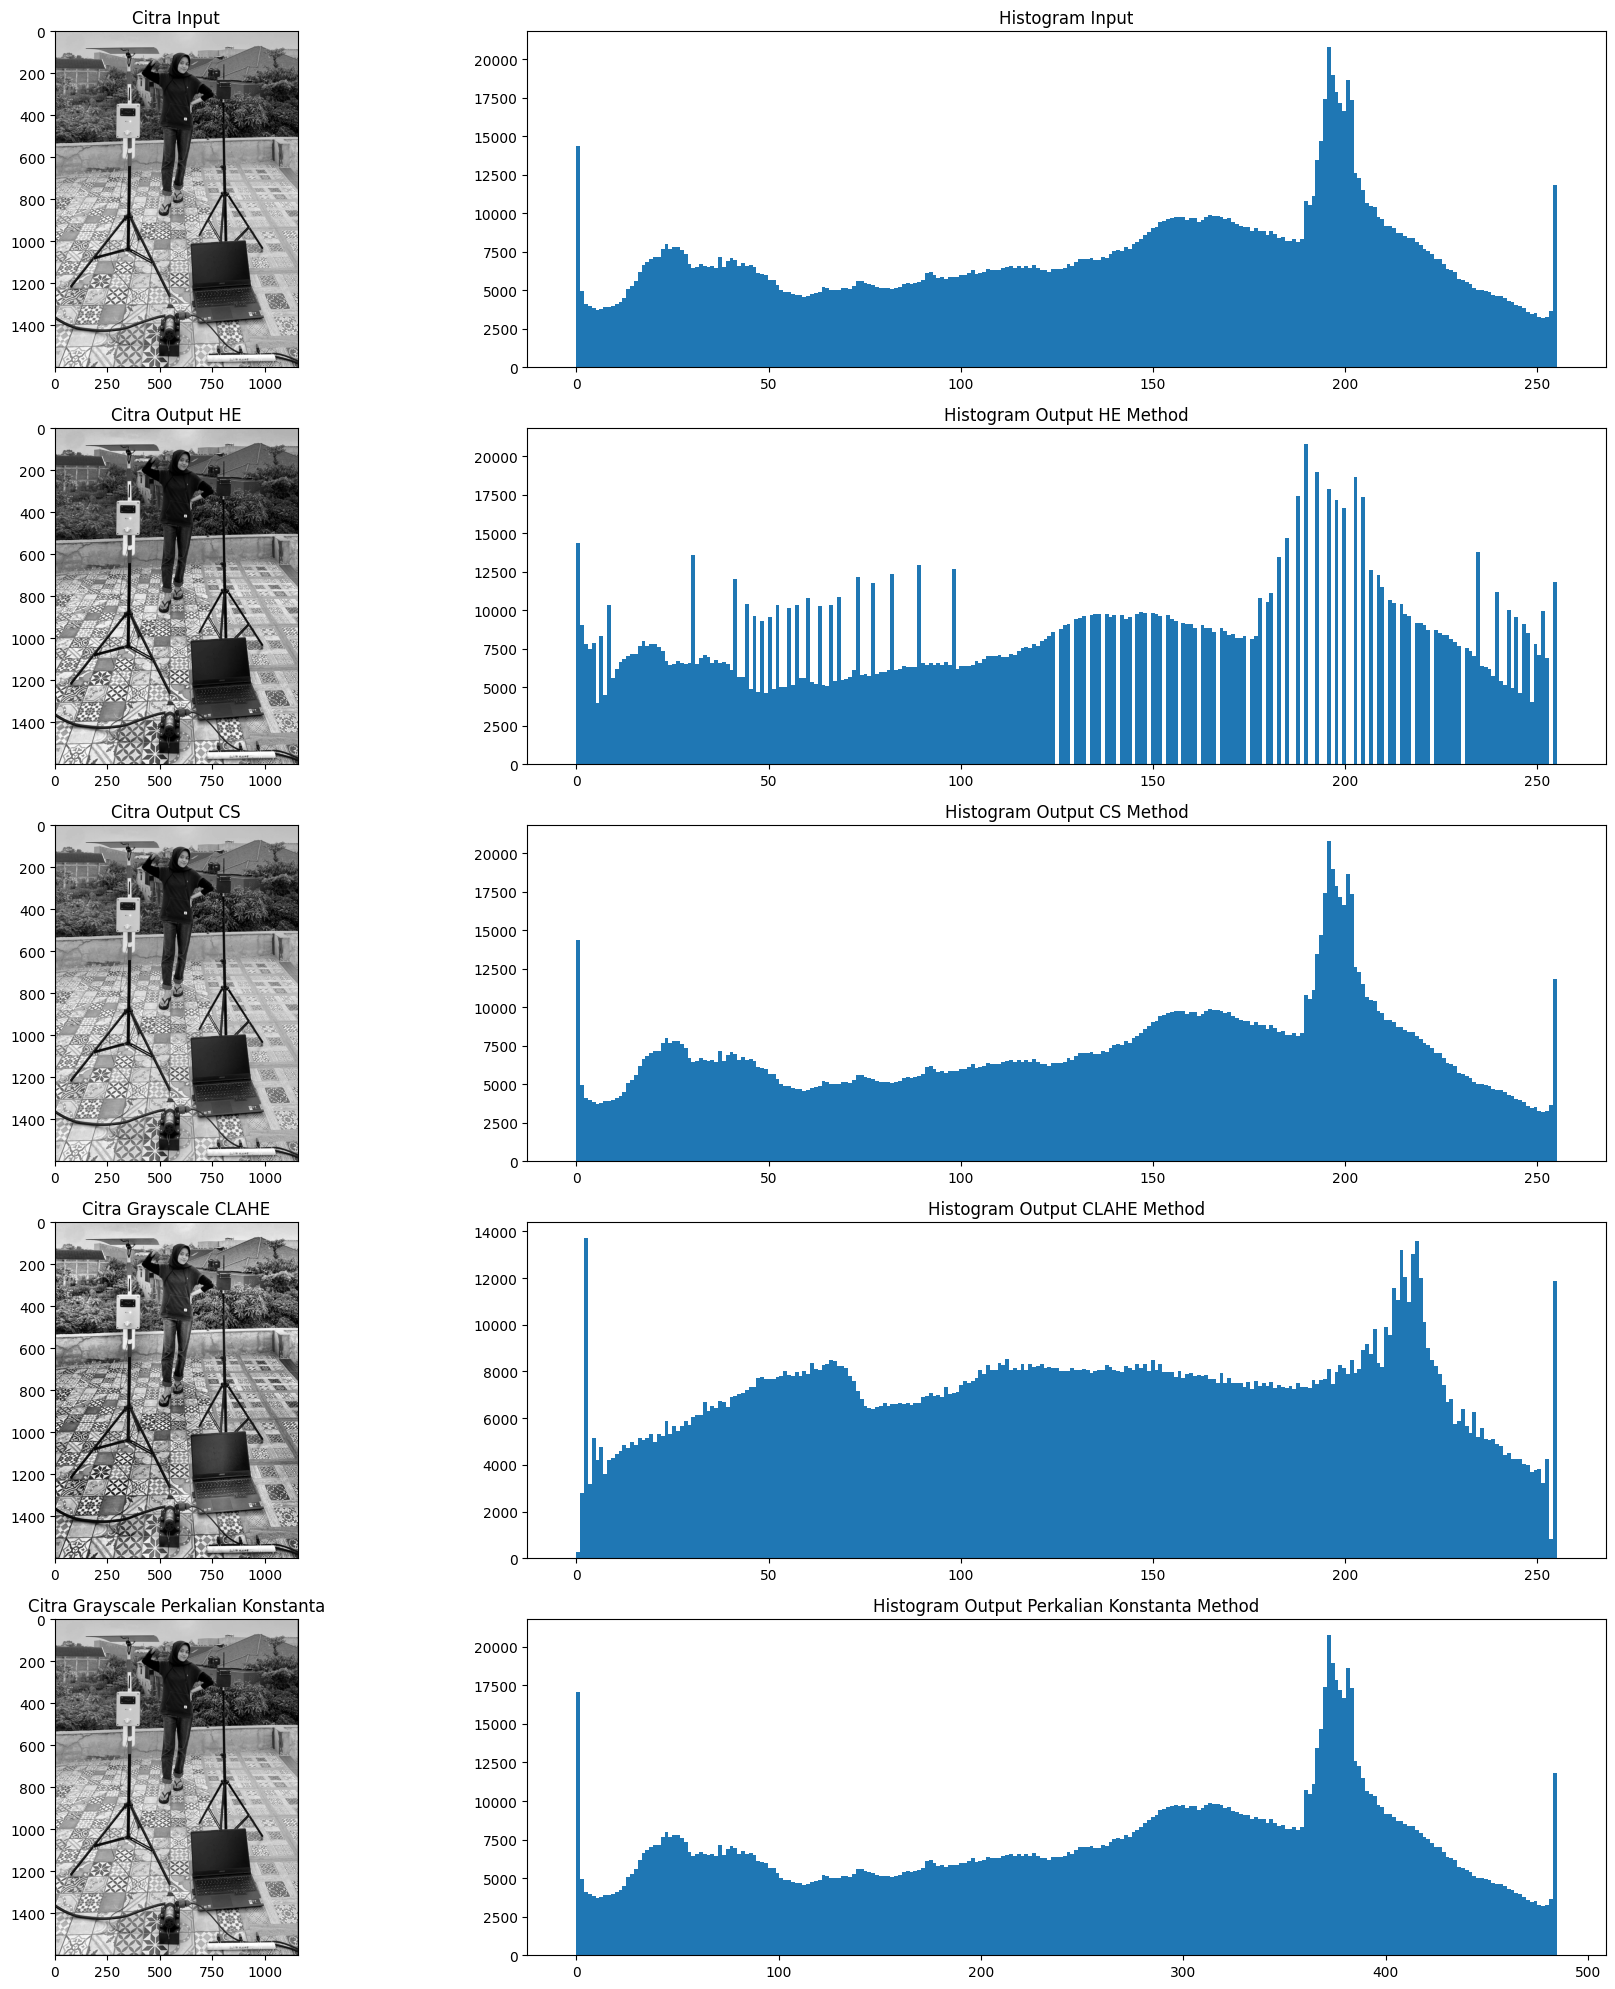

In [9]:
# Membuat figure subplot  dengan ukuran 5 baris dan 2 kolom
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
#menampilkan citra input dan histogram dari image
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')
#menampilkan citra dan histogram hasil ekualisasi histogram
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')
#menampilkan citra hasil kontras stretching dan histogramnya
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')
#menampilkan citra & histogram hasil CLAHE
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')
#menampilkan citra & histogram hasil perkalian konstanta
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')
#mengatur tata letak subplot agar lebih rapi dan sesuai
fig.tight_layout()